# Gun Incident ( EDA )

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('/content/gdrive/MyDrive/data/gun-violence-data_01-2013_03-2018.csv')
display(data.head())

Mounted at /content/gdrive


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Individual Gun Incident (2013-2018) Data Dictionary

**participant_age** data appears to be useless

In [ ]:
print(type(data))
print(list(data.columns))

print(f"data from {data.date.min()} to {data.date.max()}")

print(f"{len(data.state.unique())} states.")
print(f"{len(data.gun_type.unique())} incidents.")
print(f"{data['n_killed'].sum()} deaths.")

<class 'pandas.core.frame.DataFrame'>
['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'sources', 'state_house_district', 'state_senate_district']
data from 2013-01-01 to 2018-03-31
51 states.
2503 incidents.
60468 deaths.


0    40.3467
1    33.9090
2    41.4455
3    39.6518
4    36.1140
Name: latitude, dtype: float64

Text(0.5, 1.0, 'U.S. Gun Violence Distrubution')

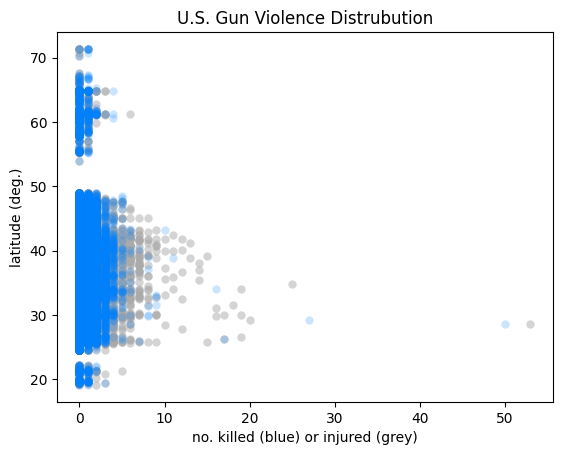

In [111]:
display(data.latitude.head())

plt.scatter(data.n_injured, data.latitude, alpha=0.5, lw=0, color="#aaaaaa")
plt.scatter(data.n_killed, data.latitude, alpha=0.2, lw=0, color="#0080ff")
plt.xlabel("no. killed (blue) or injured (grey)")
plt.ylabel("latitude (deg.)")
plt.title("U.S. Gun Violence Distrubution")

In [36]:
# calculate per capita data and plot versus latitude

gpc = pd.read_csv('/content/gdrive/MyDrive/data/raw-thoughtco-guns-per-capita-by-state.tsv', delimiter="\t")

display(gpc.head(10))

,Rank,State,# of guns per capita,# of guns registered
0,1,Wyoming,229.24,"132,806"
1,2,Washington D.C.,68.05,"47,228"
2,3,New Hampshire,46.76,"64,135"
3,4,New Mexico,46.73,"97,580"
4,5,Virginia,36.34,"307,822"
5,6,Alabama,33.15,"161,641"
6,7,Idaho,28.86,"49,566"
7,8,Arkansas,26.57,"79,841"
8,9,Nevada,25.64,"76,888"
9,10,Arizona,25.61,"179,738"


Text(0.5, 0, 'no. of guns (per capita)')

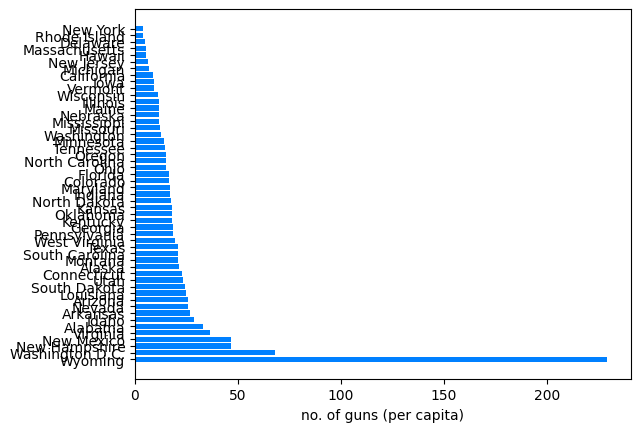

In [119]:
plt.barh(gpc['State'], gpc['# of guns per capita'], color="#0080ff")
plt.xlabel("no. of guns (per capita)")

In [45]:
set_one = data.state.unique()
set_one.sort()
print(set_one)

set_two = gpc.State.unique()
set_two.sort()
print(set_two)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio

In [46]:
data.groupby("state")[["state", "n_killed", "n_injured", "n_guns_involved"]] \
    .aggregate("sum") \
    .merge(gpc, left_on="state", right_on="State") \
    .sort_values('n_killed', ascending=False)

<ipython-input-46-dbe1e282a192>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .aggregate("sum") \


,n_killed,n_injured,n_guns_involved,Rank,State,# of guns per capita,# of guns registered
4,5562,7644,16969.0,44,California,8.710,"344,622"
42,5046,6106,9785.0,18,Texas,20.790,"588,696"
8,3909,7072,13207.0,29,Florida,16.350,"343,288"
12,3409,13514,13524.0,40,Illinois,11.440,"146,487"
34,2508,5703,9065.0,30,Ohio,14.870,"173,405"
9,2456,4056,5887.0,21,Georgia,18.220,"190,050"
37,2395,5056,7007.0,20,Pennsylvania,18.450,"236,377"
32,2225,4629,5734.0,31,North Carolina,14.818,"152,238"
17,2179,4398,5443.0,11,Louisiana,24.940,"116,831"
24,2136,3585,4894.0,36,Missouri,11.940,"72,996"


In [55]:
population = pd.read_csv("/content/gdrive/MyDrive/data/us-states-population-year.csv")

display(population.head(10))

,Unnamed: 0,state,year,population
0,1,Alabama,2010.0,4780138
1,2,Alaska,2010.0,710249
2,3,Arizona,2010.0,6392288
3,4,Arkansas,2010.0,2916028
4,5,California,2010.0,37254523
5,6,Colorado,2010.0,5029316
6,7,Connecticut,2010.0,3574147
7,8,Delaware,2010.0,897934
8,9,District of Columbia,2010.0,601766
9,10,Florida,2010.0,18804580


In [56]:
states = pd.read_csv("/content/gdrive/MyDrive/data/us-states-regions-divisions.csv")

display(states.head(10))

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [76]:
data_states = data[["state", "n_killed", "n_injured"]] \
    .groupby("state") \
    .aggregate("sum") \
    .merge(states, left_on="state", right_on="State") \
    .merge(population[population.year == 2018], left_on="State", right_on="state")

display(data_states.head(10))

,n_killed,n_injured,State,State Code,Region,Division,Unnamed: 0,state,year,population
0,1880,2998,Alabama,AL,South,East South Central,433,Alabama,2018.0,4875120
1,267,325,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786
2,1094,1096,Arizona,AZ,West,Mountain,435,Arizona,2018.0,7048876
3,773,1347,Arkansas,AR,South,West South Central,436,Arkansas,2018.0,3002997
4,5562,7644,California,CA,West,Pacific,437,California,2018.0,39399349
5,796,1133,Colorado,CO,West,Mountain,438,Colorado,2018.0,5615902
6,341,1258,Connecticut,CT,Northeast,New England,439,Connecticut,2018.0,3573880
7,217,853,Delaware,DE,South,South Atlantic,440,Delaware,2018.0,957078
8,459,1415,District of Columbia,DC,South,South Atlantic,441,District of Columbia,2018.0,695691
9,3909,7072,Florida,FL,South,South Atlantic,442,Florida,2018.0,20976812


In [107]:
data_regions = data_states \
    .groupby("Region") \
    .aggregate("sum")[["n_killed", "n_injured", "population"]]

data_regions["n_killed_capita"] = data_regions.n_killed / data_regions.population * 1e6
data_regions["n_injured_capita"] = data_regions.n_injured / data_regions.population * 1e6

data_regions = data_regions.sort_values("n_killed_capita", ascending=False)

display(data_regions)

<ipython-input-107-ac11fd7c913e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .aggregate("sum")[["n_killed", "n_injured", "population"]]


,n_killed,n_injured,population,n_killed_capita,n_injured_capita
Region,,,,,
South,29246,53145,123598424,236.621140,429.981211
Midwest,13771,34451,68156035,202.051073,505.472479
West,11050,14497,77319986,142.912597,187.493567
Northeast,6401,16309,56072676,114.155422,290.854676


Text(0, 0.5, 'no. killed (per capita)')

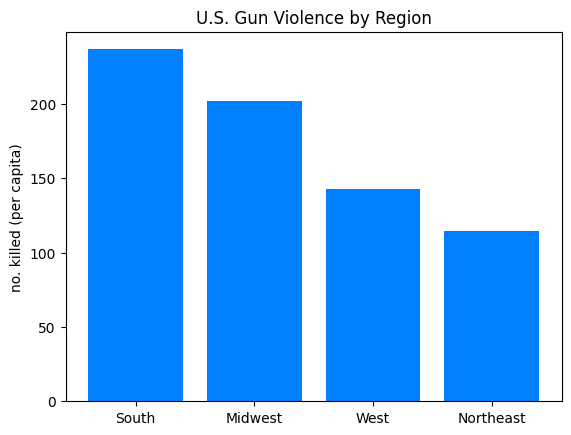

In [122]:
plt.bar(data_regions.index, data_regions.n_killed_capita, color="#0080ff")
plt.title("U.S. Gun Violence by Region")
plt.ylabel("no. killed (per capita)")